# **PRIMER PARCIAL - DATASET 117 - HOUSE SALES ON KING COUNTRY, USA**
NAVA SIÑANI KELVIN JHERMAN

Regresion Multiple

In [1]:
# utilizado para manejos de directorios y rutas
import os

import pandas as pd
# Librerias para graficación (trazado de gráficos)
import matplotlib.pyplot as plt

# Computacion vectorial y cientifica para python
import numpy as np


# llama a matplotlib a embeber graficas dentro de los cuadernillos
%matplotlib inline

In [4]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive
Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [6]:
# Cargar los datos del archivo CSV en un DataFrame
data = pd.read_csv('/content/gdrive/MyDrive/kc_house_data.csv')



# Convertir los datos de la columna 'floors' a enteros
data['floors'] = data['floors'].astype(int)

# Extraer las columnas no necesarias y definir la columna de "y"
X_test = data.iloc[0:17300, [3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 19, 20]]  # Excluyendo las columnas 0, 1 y 2 (x_test el 80% de los ejemplos del dataset)
y_test = data.iloc[0:17300:, 2]  # La columna 3 (segunda columna), que es tu variable objetivo (y) (y_test el 80% de los ejemplos del dataset)


# Extraer las columnas no necesarias y definir la columna de "y" para train
X_train = data.iloc[17300:, [3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 19, 20]]  # Excluyendo las columnas 0, 1 y 2 (x_train el 80% de los ejemplos del dataset)
y_train = data.iloc[17300:, 2]  # La columna 3 (segunda columna), que es tu variable objetivo (y) (y_train el 80% de los ejemplos del dataset)



X=X_test
y=y_test
# Calcular el número de ejemplos de entrenamiento
m = len(y)
print(X)
print(y)

       bedrooms  bathrooms  sqft_living  sqft_lot  floors  waterfront  view  \
0             3       1.00         1180      5650       1           0     0   
1             3       2.25         2570      7242       2           0     0   
2             2       1.00          770     10000       1           0     0   
3             4       3.00         1960      5000       1           0     0   
4             3       2.00         1680      8080       1           0     0   
...         ...        ...          ...       ...     ...         ...   ...   
17295         4       2.25         1970      7125       1           0     0   
17296         1       1.00         1390     60984       1           0     0   
17297         4       1.00         1020     11383       1           0     0   
17298         4       2.50         2250      7526       2           0     0   
17299         2       1.00          800      6240       1           0     0   

       condition  grade  sqft_above  sqft_basement 

In [7]:
#scala cada característica individualmente restando el valor mínimo y luego dividiendo por el rango (es decir, la diferencia entre el máximo y el mínimo)
from sklearn.preprocessing import MinMaxScaler

# Convertir datos a tipo float
X = X.astype(float)

# Crear el objeto MinMaxScaler
scaler = MinMaxScaler()

# Ajustar el scaler a los datos y transformarlos
X_normalized = scaler.fit_transform(X)

print(X_normalized)

[[0.09090909 0.125      0.06150342 ... 0.         0.16476974 0.00573207]
 [0.09090909 0.28125    0.16704632 ... 0.98808933 0.22605498 0.00801686]
 [0.06060606 0.125      0.03037206 ... 0.         0.40640868 0.00850277]
 ...
 [0.12121212 0.125      0.04935459 ... 0.         0.15601471 0.01212236]
 [0.12121212 0.3125     0.14274867 ... 0.         0.27683418 0.00788706]
 [0.06060606 0.125      0.03264996 ... 0.         0.19803887 0.00843155]]


In [8]:
#normalizamos las características
def  featureNormalize(X):
    X_norm = X.copy()
    mu = np.zeros(X.shape[1])
    sigma = np.zeros(X.shape[1])

    mu = np.mean(X, axis = 0)
    sigma = np.std(X, axis = 0)
    X_norm = (X - mu) / sigma

    return X_norm, mu, sigma

In [9]:
# llama featureNormalize con los datos cargados
X_norm, mu, sigma = featureNormalize(X)

print(X)
print('Media calculada:', mu)
print('Desviación estandar calculada:', sigma)
print(X_norm)

       bedrooms  bathrooms  sqft_living  sqft_lot  floors  waterfront  view  \
0           3.0       1.00       1180.0    5650.0     1.0         0.0   0.0   
1           3.0       2.25       2570.0    7242.0     2.0         0.0   0.0   
2           2.0       1.00        770.0   10000.0     1.0         0.0   0.0   
3           4.0       3.00       1960.0    5000.0     1.0         0.0   0.0   
4           3.0       2.00       1680.0    8080.0     1.0         0.0   0.0   
...         ...        ...          ...       ...     ...         ...   ...   
17295       4.0       2.25       1970.0    7125.0     1.0         0.0   0.0   
17296       1.0       1.00       1390.0   60984.0     1.0         0.0   0.0   
17297       4.0       1.00       1020.0   11383.0     1.0         0.0   0.0   
17298       4.0       2.50       2250.0    7526.0     2.0         0.0   0.0   
17299       2.0       1.00        800.0    6240.0     1.0         0.0   0.0   

       condition  grade  sqft_above  sqft_basement 

In [10]:
# Añade el termino de interseccion a X
# (Columna de unos para X0)
X = np.concatenate([np.ones((m, 1)), X_norm], axis=1)

In [11]:
print(X)

[[ 1.         -0.3917899  -1.40162303 ... -0.21655405 -0.94260737
  -0.27935171]
 [ 1.         -0.3917899   0.24676234 ...  4.60614559 -0.4231349
  -0.20635138]
 [ 1.         -1.46019553 -1.40162303 ... -0.21655405  1.10559836
  -0.19082643]
 ...
 [ 1.          0.67661572 -1.40162303 ... -0.21655405 -1.01681772
  -0.07517834]
 [ 1.          0.67661572  0.57643941 ... -0.21655405  0.00728514
  -0.21049871]
 [ 1.         -1.46019553 -1.40162303 ... -0.21655405 -0.66060803
  -0.19310195]]


## DESCENSO POR GRADIENTE

In [12]:
def computeCostMulti(X, y, theta):
    # Inicializa algunos valores utiles
    m = y.shape[0] # numero de ejemplos de entrenamiento

    J = 0

    h = np.dot(X, theta)

    J = (1/(2 * m)) * np.sum(np.square(np.dot(X, theta) - y))

    return J

In [13]:
def gradientDescentMulti(X, y, theta, alpha, num_iters):

    # Inicializa algunos valores
    m = y.shape[0] # numero de ejemplos de entrenamiento

    # realiza una copia de theta, el cual será acutalizada por el descenso por el gradiente

    theta = theta.copy()

    J_history = []

    for i in range(num_iters):
        theta = theta - (alpha / m) * (np.dot(X, theta) - y).dot(X)
        J_history.append(computeCostMulti(X, y, theta))

    return theta, J_history

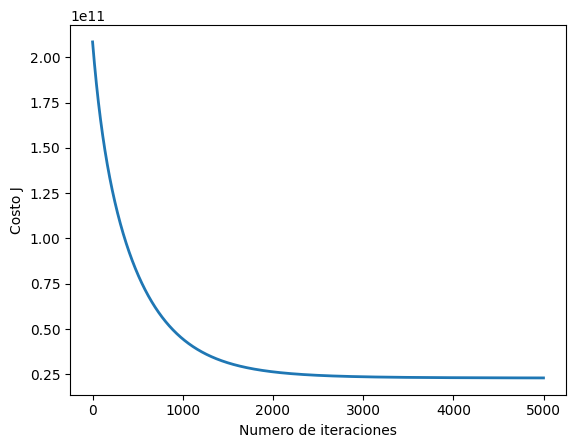

Theta calculado por el descenso por el gradiente: [ 5.29605873e+05 -3.06522416e+04  3.00320502e+04  7.51187497e+04
 -2.76386860e+02  5.84809047e+03  5.06502958e+04  3.63707037e+04
  1.73352856e+04  1.12220365e+05  6.58953743e+04  3.28698775e+04
 -9.55925163e+04  9.82177601e+03  4.28263655e+04 -1.60806401e+04]
El precio predecido para un conjunto de características X_array (usando el descenso por el gradiente): $348735.17


In [14]:

# Elegir algún valor para alpha (probar varias alternativas)
alpha = 0.001
num_iters = 5000

# Inicializa theta y ejecuta el descenso por el gradiente
theta = np.zeros(X.shape[1])
y = y.astype(float)
theta, J_history = gradientDescentMulti(X, y, theta, alpha, num_iters)

# Grafica la convergencia del costo
plt.plot(np.arange(len(J_history)), J_history, lw=2)
plt.xlabel('Numero de iteraciones')
plt.ylabel('Costo J')
plt.show()

# Muestra los resultados del descenso por el gradiente
print('Theta calculado por el descenso por el gradiente:', theta)


X_array = np.array([3,2.5,1600,2388,2,0,0,3,8,1600,0,2004,0,1410,1287])
X_array_normalized = (X_array - mu) / sigma
X_array_normalized = np.insert(X_array_normalized, 0, 1)  # Agregar el término de intersección
price = np.dot(X_array_normalized, theta)

print('El precio predecido para un conjunto de características X_array (usando el descenso por el gradiente): ${:.2f}'.format(price))


In [15]:
X_array = [1,3,1,1180,5650,1,0,0,3,7,1180,0,1955,0,1340,5650]
X_array[1:19] = (X_array[1:19] - mu) / sigma

In [16]:

price = np.dot(X_array, theta)   # Se debe cambiar esto

print('El precio predecido para una casa de las características de x_array (usando el descenso por el gradiente): ${:.0f}'.format(price))

El precio predecido para una casa de las características de x_array (usando el descenso por el gradiente): $273641
